In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# reading the Dataset
file_path = '/content/drive/MyDrive/Project/Drugs_data.csv'
df = pd.read_csv(file_path)


In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
# summarizing the Dataset
df[['rating','usefulCount']].describe()

,rating,usefulCount
count,215063.000000,215063.000000
mean,6.990008,28.001004
std,3.275554,36.346069
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [ ]:
# Lets check the Number and Name of the Drugs with 0 Useful Count in Details
print("Analysis on Useless Drugs")
print("----------------------------")
print("The Number of Drugs with No Useful Count :", df[df['usefulCount'] == 0].count()[0])

# Lets Check the Number of Drugs with No Usesful Count with Review Greater than or Equal to 8
print("Number of Good Drugs with Lesser Useful Count :", df[(df['usefulCount'] == 0) &
                                                df['rating'] > 7].count()[0])

# Lets Check the Average Rating of the Drugs with No Useful Count
print("Average Rating of Drugs with No Useful Count : {0:.2f}".format(df[df['usefulCount'] == 0]['rating'].mean()))

Analysis on Useless Drugs
----------------------------
The Number of Drugs with No Useful Count : 8402
Number of Good Drugs with Lesser Useful Count : 0
Average Rating of Drugs with No Useful Count : 5.82


<ipython-input-36-d4147b8790d8>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("The Number of Drugs with No Useful Count :", df[df['usefulCount'] == 0].count()[0])
<ipython-input-36-d4147b8790d8>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of Good Drugs with Lesser Useful Count :", df[(df['usefulCount'] == 0) &


In [ ]:
# lets check for Missing Values
df.isnull().sum()

# as we know that condition is an Important Column, so we will delete all the records where Condition is Missing
df = df.dropna()

# lets check the Missing values now
df.isnull().sum().sum()


0

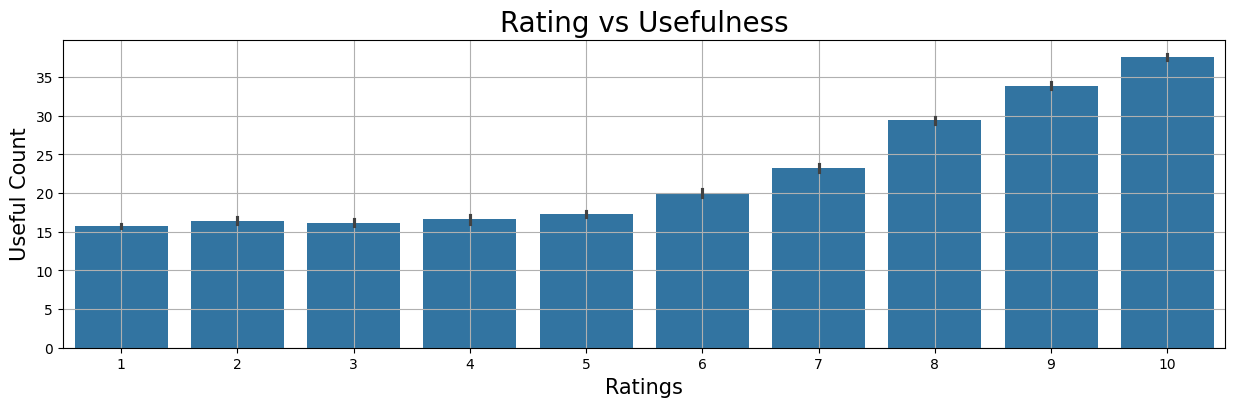

In [ ]:
# lets check the Impact of Ratings on Usefulness


sns.barplot(x='rating', y='usefulCount', data=df)
plt.grid(True)
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Useful Count', fontsize=15)
plt.title('Rating vs Usefulness', fontsize=20)
plt.show()

In [ ]:
# Checking whether Length of Review has any Impact on Ratings of the Drugs

# for that we need to create a new column to calculate length of the reviews
df['len']  = df['review'].apply(len)

In [ ]:
# lets check the Impact of Length of Reviews on Ratings
df[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.112969   3680
2        9  454.001087  10745
3        8  457.932464   5112
4        5  464.902899   3030
5        6  478.249108   2042
6        4  468.539569   2202
7        6  484.610906   3055
8        3  482.337187   4086
9        3  477.006192   6166
10       3  443.448952   6170

In [ ]:
df['len']

,len
0,79
1,741
2,755
3,448
4,719
...,...
161292,689
161293,262
161294,95
161295,772


In [ ]:
# as it is clear that the reviews have so many unnecassry things such as Stopwords, Punctuations, numbers etc

# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

df['review'] = df['review'].apply(punctuation_removal)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords

# Load stopwords and add custom ones
stop = stopwords.words('english')
stop.append("i'm")  # Adding a custom stopword

# Remove punctuation from stopwords
def punctuation_removal(word):
    return word.strip(".,!?;:'\"")

stop_words = [punctuation_removal(item) for item in stop]

# Tokenization and stopword removal using re
def stopwords_removal(messy_str):
    tokens = re.findall(r'\b\w+\b', messy_str)  # Tokenize by matching words
    return [word.lower() for word in tokens if word.lower() not in stop_words]

# Apply stopword removal to the DataFrame column
df['review'] = df['review'].apply(stopwords_removal)


In [ ]:
# lets remove the Numbers also

import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

df['review'] = df['review'].apply(drop_numbers)

In [ ]:
# for using Sentiment Analyzer we will have to dowload the Vader Lexicon from NLTK

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# lets calculate the Sentiment from Reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

train_sentiments = []

for i in data['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))

train_sentiments = np.asarray(train_sentiments)
df['sentiment'] = pd.Series(data=train_sentiments)

In [ ]:
# as we can see that Sentiment and length of the review are not related to Reviews, we will drop the sentiment column

# lets remove the unique Id, date, review, len, and sentiment column also
df = df.drop(['date','uniqueID','sentiment','review','len'], axis = 1)

# lets check the name of columns now
df.columns

Index(['drugName', 'condition', 'rating', 'usefulCount'], dtype='object')

In [ ]:
# Lets Calculate an Effective Rating


min_rating = df['rating'].min()
max_rating = df['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating *= 5
    rating = int(round(rating,0))

    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1

df['eff_score'] = df['rating'].apply(scale_rating)

In [ ]:
# lets also calculate Usefulness Score

df['usefulness'] = df['rating']*df['usefulCount']*df['eff_score']

# lets check the Top 10 Most Useful Drugs with their Respective Conditions
df[['drugName','condition','usefulness']][df['usefulness'] >
                            df['usefulness'].mean()].sort_values(by = 'usefulness',
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,condition,usefulness
0,Zoloft,Depression,12910
1,Sertraline,Depression,12910
2,Levonorgestrel,Birth Control,12470
3,Mirena,Birth Control,12470
4,Zoloft,Depression,8541
5,Sertraline,Depression,8541
6,Phentermine,Weight Loss,7960
7,Adipex-P,Weight Loss,7960
8,Implanon,Birth Control,7300
9,Etonogestrel,Birth Control,7300


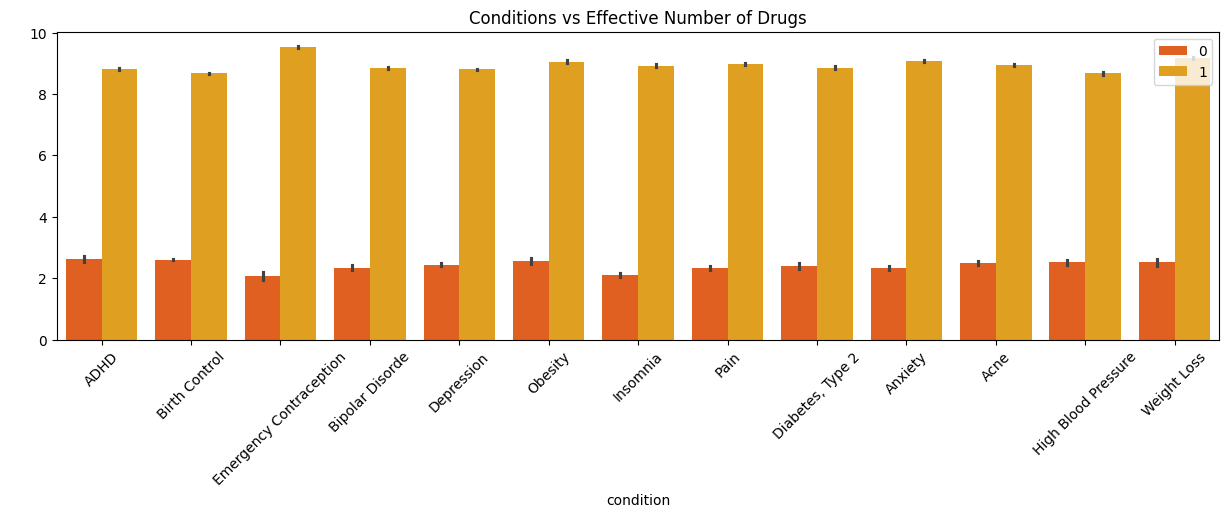

In [ ]:
# lets check this in Graph,

popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia','Weight Loss',
                      'Obesity','ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure','Migrane')
conditions = df.loc[df['condition'].isin(popular_conditions)]

sns.barplot(x = conditions['condition'], y = conditions['rating'], hue = df['eff_score'],
     palette = 'autumn')
plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation = 45)
plt.ylabel(' ')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# lets remove all the Duplicates from the Dataset
df = df.drop_duplicates()

In [ ]:
output = {}

conditions = df['condition'].unique()
for condition in conditions:
    top_drug = (
        df[df['condition'] == condition]
        .sort_values(by='usefulness', ascending=False)
        .head(1)
    )

    output[condition] = {
        "drug": top_drug['drugName'].values[0]
    }

print(output)

{'Left Ventricular Dysfunction': {'drug': 'Coreg'}, 'ADHD': {'drug': 'Amphetamine / dextroamphetamine'}, 'Birth Control': {'drug': 'Levonorgestrel'}, 'Opiate Dependence': {'drug': 'Buprenorphine / naloxone'}, 'Benign Prostatic Hyperplasia': {'drug': 'Tadalafil'}, 'Emergency Contraception': {'drug': 'Plan B One-Step'}, 'Bipolar Disorde': {'drug': 'Lamotrigine'}, 'Epilepsy': {'drug': 'Keppra'}, 'Migraine Prevention': {'drug': 'Nortriptyline'}, 'Depression': {'drug': 'Zoloft'}, "Crohn's Disease": {'drug': 'Humira'}, 'Cough': {'drug': 'Vicodin'}, 'Obesity': {'drug': 'Topiramate'}, 'Urinary Tract Infection': {'drug': 'Amoxicillin'}, 'ibromyalgia': {'drug': 'Pregabalin'}, 'Chronic Myelogenous Leukemia': {'drug': 'Gleevec'}, 'HIV Infection': {'drug': 'Abacavir / dolutegravir / lamivudine'}, 'Insomnia': {'drug': 'Amitriptyline'}, 'Rheumatoid Arthritis': {'drug': 'Methotrexate'}, 'Vaginal Yeast Infection': {'drug': 'Fluconazole'}, 'Chlamydia Infection': {'drug': 'Azithromycin'}, 'Hirsutism': {'

In [ ]:
import json
with open("top_drugs.json", "w") as json_file:
    json.dump(output, json_file, indent=4)